**Feature selection** – also known as **variable selection**, **attribute selection**, or
**variable subset selection** – is a method used to select a subset of features (variables,
dimensions) from an initial dataset. 

Feature selection is a key step in the process of building machine learning models and 
can have a huge impact on the performance of a model. Using correct and relevant features as 
the input to your model can also reduce the chance of overfitting, because having more relevant 
features reduces the opportunity of a model to use noisy features that don't add signal as input. 

Lastly, having less input features decreases the amount of time that it will take to train a
model.

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE, RFECV

In [3]:
df = pd.read_csv("../Data/Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Droping some columns

- [x] id : This can not be used for classification
- [x] Unnamed: 32 - Missing Values
- [x] diagnosis - Target variable

In [6]:
y = df["diagnosis"]
list_of_droping_columns = ['Unnamed: 32','id','diagnosis']
x = df.drop(list_of_droping_columns, axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
## Describe Data
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## standardize the data

Consider our data above with `housing` and `income`, both have different scales and units. We can start to compare these features and use them in our models once we have standardized them.

In [8]:
col_name = x.columns

#create the scaler object
scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=col_name)

In [9]:
# data after standarsization
scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=10)

## 1. Heatmap for Check co-relation

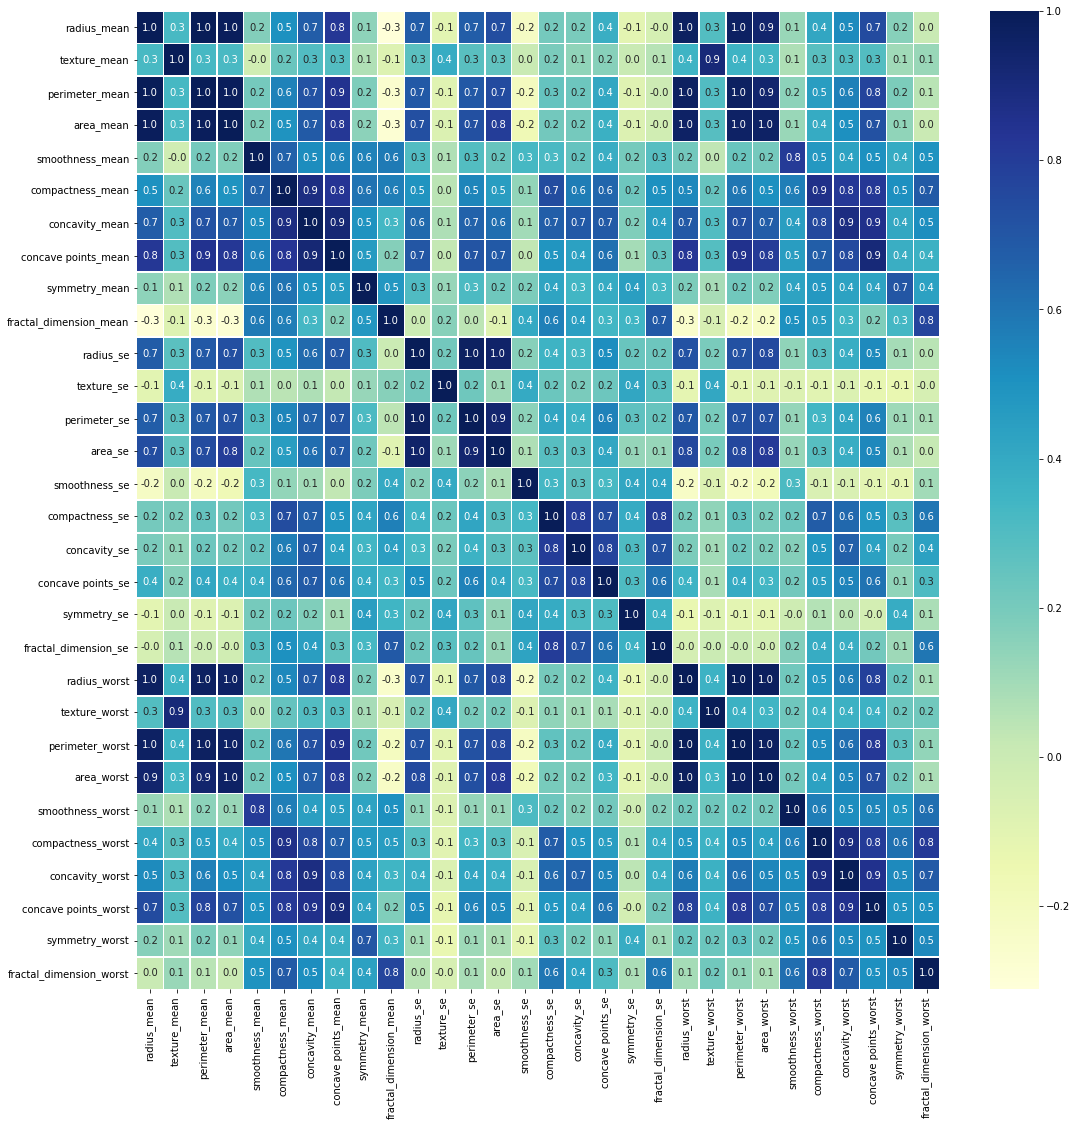

In [39]:
# Check correlation between features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")

## 2. Univariate Feature selection

Statistical tests can be used to determine which features have the strongest
correlation to the output variable. The scikit-learn library has a class called
SelectKBest that provides a set of statistical tests to select the K "best" features
in a dataset.

In [23]:
# find 5 best features
selected_features = SelectKBest(chi2, k=5)
selected_features.fit(x_train, y_train)

SelectKBest(k=5, score_func=<function chi2 at 0x7f5cb472b170>)

In [26]:
feature_score = selected_features.scores_
feature_score
#create graph to show top 5 feature

array([1.87014456e+02, 7.11904528e+01, 1.40899984e+03, 3.82566955e+04,
       8.56791629e-02, 3.42424191e+00, 1.34817316e+01, 6.93927340e+00,
       1.23583885e-01, 4.97767426e-04, 2.49197612e+01, 3.31309434e-03,
       1.81595402e+02, 6.30070695e+03, 2.83258006e-03, 3.74939202e-01,
       8.26905546e-01, 2.17342340e-01, 2.01813055e-03, 3.74366079e-03,
       3.36999351e+02, 1.18860483e+02, 2.52720436e+03, 7.73535881e+04,
       2.20324561e-01, 1.24823220e+01, 2.70934030e+01, 8.72576170e+00,
       6.82759436e-01, 1.39966243e-01])

In [37]:
feature_score = pd.DataFrame(feature_score, index=x.columns) 

Text(0.5, 1.0, 'Top 5 features')

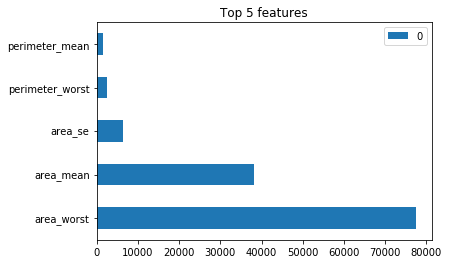

In [45]:
feature_score.nlargest(5, feature_score).plot(kind="barh")
plt.title("Top 5 features")

In [50]:
x_train_2 = selected_features.transform(x_train)
x_test_2 = selected_features.transform(x_test)
clf = RandomForestClassifier(n_estimators=100).fit(x_train_2, y_train)

In [52]:
predicted_y = clf.predict(x_test_2)

In [61]:
print("Accuracy score : ",accuracy_score(y_test, predicted_y))
print("Confusion Matrix :\n", confusion_matrix(y_test, predicted_y))

Accuracy score :  0.9415204678362573
Confusion Matrix :
 [[109   3]
 [  7  52]]


## 3. Recursive feature elimination (RFE) - wrapper based method
**Recursive Feature Elimination**: The recursive feature elimination method
is a greedy optimization algorithm with a stated goal of finding the best
performing feature subset. It iteratively creates models and stores the best
or the worst performing feature during each iteration. It constructs the
next model with the remaining features until all the features are exhausted.
The features are then ranked based on the order of their elimination.

In [63]:
clf3 = RandomForestClassifier()
rfe = RFE(estimator=clf3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [64]:
# 5 best features by RFE
x_train.columns[rfe.support_]

Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

## 4. Recursive feature elimination with cross validation

In [66]:
clf4 = RandomForestClassifier()
# 10 fold cross validation
rfecv = RFECV(estimator=clf4, step=1, cv=10, scoring="accuracy")
rfecv = rfecv.fit(x_train, y_train)

In [67]:
# best features selected by RFECV
x_train.columns[rfecv.support_]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')

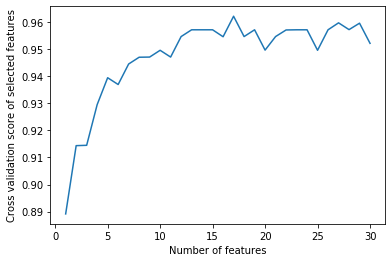

In [74]:
len_of_feature = range(1, len(rfecv.grid_scores_) + 1)   # create range for x axis
plt.xlabel("Number of features")
plt.ylabel("Cross validation score of selected features")
plt.plot(len_of_feature, rfecv.grid_scores_)

## 5. Extra Tree Classifier
The importance of each feature of a dataset can be established by using this method.
Feature importance provides a score for each feature in a dataset. A higher score
means the feature has more importance or relevancy in relation to the output feature.
Feature importance is normally an inbuilt class that comes with Tree-Based Classifiers.
In the following example, we use the Extra Tree Classifier to determine the top five
features in a dataset:

In [13]:
clf5 = ExtraTreesClassifier()
clf5.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [16]:
clf5.feature_importances_
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

array([0.08490231, 0.01921122, 0.04454922, 0.06243989, 0.00926482,
       0.02338975, 0.05265728, 0.07811573, 0.00756008, 0.00631429,
       0.02302027, 0.00736087, 0.01408621, 0.02169793, 0.00601572,
       0.00966642, 0.00914355, 0.01033014, 0.00598734, 0.00729833,
       0.06400698, 0.03569099, 0.09436001, 0.10493852, 0.02262336,
       0.02309217, 0.04227787, 0.0838311 , 0.01459811, 0.01156951])

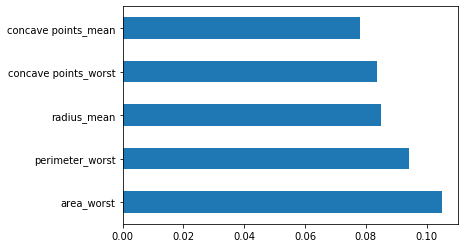

In [19]:
feat_importances = pd.Series(clf5.feature_importances_, index=x_train.
columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()